In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
p = 1-1e-10
np.log(p / (1 - p))                       

23.025850847100088

In [4]:
p = 0.8
np.log(p / (1 - p))

1.3862943611198908

In [5]:
np.log(p / (1 - p)) # (-inf, +inf)

1.3862943611198908

In [6]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [8]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [9]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [10]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

### Домашняя работа

<font color='red'> 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  
(если честно, то посмотрела help для sklearn.metrics.log_loss)</font>

In [11]:
def calc_logloss(y, y_pred, eps=1e-10):
  y2=np.array([max(eps, min(1 - eps, p)) for p in y_pred])
  err = - np.mean(y * np.log(y2) + (1.0 - y) * np.log(1.0 - y2))
  return err

In [12]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1,0])
calc_logloss(y1, y_pred1)

1.000000082790371e-10

In [13]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [14]:
z = np.linspace(-10, 10, 101)
z

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

In [15]:
probabilities = sigmoid(z)

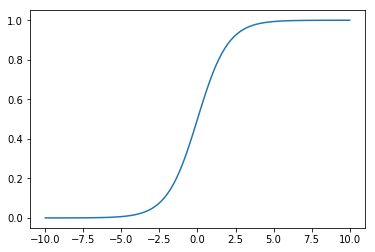

In [16]:
plt.plot(z, probabilities)

In [17]:
### Logistic Regression

<font color='red'>2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.</font>


In [18]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [19]:
def eval_model(X, y, iterations=0, alpha=1e-1):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  loss=1
  while loss>=0.2:
        iterations+=1
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        loss=min(loss, err)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if iterations % 1000 == 0:
            print(iterations, W, err)
  print(iterations, W, err, np.round(y_pred,2))           
  return W

In [20]:
W = eval_model(X_st, y, iterations=0, alpha=0.1)

1000 [-2.77136565 -0.99588853  0.56641089  3.26813012] 0.4058781527072773
2000 [-4.59094777 -1.0359998  -0.13825631  4.44501211] 0.35333924193451927
3000 [-5.91004767 -1.08773886 -0.62127728  5.36155604] 0.32501347614925347
4000 [-6.96133333 -1.14371437 -0.98694403  6.13057114] 0.3066241878369146
5000 [-7.85498033 -1.19935714 -1.28748713  6.80564285] 0.2931244675498326
6000 [-8.64731257 -1.25347799 -1.54786532  7.41682354] 0.2823933404331382
7000 [-9.36966717 -1.30586395 -1.78130777  7.98193089] 0.27340382430941684
8000 [-10.04075209  -1.35657036  -1.99546097   8.51208184] 0.26560192980297886
9000 [-10.67239108  -1.40571631  -2.1950503    9.01453862] 0.2586628760279487
10000 [-11.27241705  -1.45342424  -2.38315559   9.49424167] 0.2523832489493557
11000 [-11.84623134  -1.49980367  -2.56187444   9.95467602] 0.2466285423619432
12000 [-12.39769211  -1.54494868  -2.73269053  10.39838241] 0.24130563028249813
13000 [-12.92964426  -1.58893958  -2.89668883  10.82727043] 0.23634741208557922
1400

<font color='red'>3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).</font>


In [21]:
def calc_pred_proba(W, X):
    z=np.dot(W, X)
    return sigmoid(z)

In [22]:
y_pred_proba=calc_pred_proba(W, X_st)
y_pred_proba

array([0.31974795, 0.07493517, 0.99992888, 0.16327147, 0.80609228,
       0.19461528, 0.99999004, 0.06069275, 0.42180872, 0.99935982])

<font color='red'>4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).</font>

In [23]:
def calc_pred (W, X, limit=0.5):
    y_pred_final=np.array([1 if p>=limit else 0 for p in y_pred_proba])
    return y_pred_final

In [24]:
y_pred_final=calc_pred (W, X_st, limit=0.5)

In [25]:
y-y_pred_final

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

<font color='red'>5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.</font>

In [26]:
def accuracy (y, y_pred):
    return 1-np.mean(abs(y-y_pred))

In [27]:
accuracy (y, y_pred_final)

0.9

In [28]:
err_matrix=np.zeros((2,2))
err_matrix

array([[0., 0.],
       [0., 0.]])

In [29]:
for i in range(len(y)):
    if y[i]==1 and y_pred_final[i]==1:
        err_matrix[0][0]+=1
    elif y[i]==1 and y_pred_final[i]==0:
        err_matrix[1][0]+=1
    elif y[i]==0 and y_pred_final[i]==0:
        err_matrix[1][1]+=1
    elif y[i]==0 and y_pred_final[i]==0:
        err_matrix[0][1]+=1

In [30]:
err_matrix

array([[4., 0.],
       [1., 5.]])

In [31]:
TP=err_matrix[0][0]
TN=err_matrix[1][1]
FP=err_matrix[1][0]
FN=err_matrix[0][1]
TP, TN, FP, FN

(4.0, 5.0, 1.0, 0.0)

In [32]:
#точность
precision = TP/(TP+FP)
precision

0.8

In [33]:
#полнота:
recall=TP/(TP+FN)
recall

1.0

In [34]:
# F1 score
F1=2*precision*recall/(precision+recall)
F1

0.888888888888889

<font color='red'>6. Могла ли модель переобучиться? Почему?</font>

Модель могла переобучиться т.к. из-за небольшого размера исходной выборки, веса могли под нее подстраиваться, ничем не сдерживаясь

<font color='red'>7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.</font>

In [35]:
def eval_model_l1(X, y, iterations, alpha, l1):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]

  for i in range(1,iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)+ l1/2*np.sign(W))
        if i % 1000 == 0:
            print(i, W, err)
  print(iterations, W, err, np.round(y_pred,2))           
  return W

In [36]:
#Рассмотрим результат, получаемый при предыдущих alpha и iterations, но с регуляризацией
eval_model_l1(X_st, y, iterations=23000, alpha=0.1, l1=1e-4)

1000 [-2.7685615  -0.99501561  0.56594317  3.26507732] 0.40597899152628036
2000 [-4.58510174 -1.03529195 -0.13671929  4.44017589] 0.3534861929075429
3000 [-5.89975156 -1.08712026 -0.61757744  5.3539372 ] 0.32521192758030826
4000 [-6.9469357  -1.14277592 -0.98192461  6.11965251] 0.30685772029850916
5000 [-7.83647091 -1.19805635 -1.28120775  6.79132573] 0.2933892338875495
6000 [-8.62460741 -1.25179563 -1.54032013  7.39901607] 0.28268849192776285
7000 [-9.34267404 -1.30378721 -1.77247967  7.96055318] 0.27372914625585926
8000 [-10.00939189  -1.35409061  -1.9853332    8.48707259] 0.2659571757434481
9000 [-10.63660431  -1.40282809  -2.18361019   8.98585584] 0.2590475924851015
10000 [-11.23216421  -1.45012453  -2.3703955    9.46186097] 0.25279675736621426
11000 [-11.80149103  -1.4960913   -2.54779163   9.91858789] 0.24706997197814212
12000 [-12.3484583   -1.54082392  -2.71728651  10.35858955] 0.24177396434181397
13000 [-12.87592346  -1.58440375  -2.87996863  10.78378513] 0.23684153334664773
1

array([-17.39675194,  -1.96871693,  -4.25141028,  14.44493756])

In [37]:
def eval_model_l2(X, y, iterations, alpha, l2):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]

  for i in range(1,iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)+ l2*W)
        if i % 1000 == 0:
            print(i, W, err)
  print(iterations, W, err, np.round(y_pred,2))           
  return W

In [38]:
#Рассмотрим результат, получаемый при предыдущих alpha и iterations, но с регуляризацией
eval_model_l2(X_st, y, iterations=23000, alpha=0.1, l2=1e-4)

1000 [-2.75796803 -0.99318779  0.56721109  3.25568703] 0.4063554581013665
2000 [-4.54843546 -1.03200518 -0.12694497  4.41197657] 0.3543906944520391
3000 [-5.82938809 -1.08141721 -0.5969543   5.29963396] 0.32657871751193973
4000 [-6.83493004 -1.13404655 -0.94776354  6.03257446] 0.30869320640303227
5000 [-7.67579966 -1.18548931 -1.23162974  6.66519516] 0.2957149739074884
6000 [-8.40880748 -1.23467907 -1.47357174  7.22819196] 0.28553139959473317
7000 [-9.06579096 -1.28149806 -1.68692013  7.73994988] 0.2771157118741075
8000 [-9.66596264 -1.32607943 -1.87944374  8.21210081] 0.26991087395333385
9000 [-10.2216373   -1.36860756  -2.05599725   8.65237484] 0.26358788827936913
10000 [-10.74111235  -1.40926034  -2.21978834   9.06613496] 0.25793890180553497
11000 [-11.23021953  -1.4481948   -2.37303625   9.45724523] 0.2528251894567295
12000 [-11.69321015  -1.48554589  -2.51733748   9.82858453] 0.2481498253144169
13000 [-12.1332846   -1.52142924  -2.65388001  10.18236283] 0.24384240091902148
14000 [

array([-15.64700258,  -1.81656298,  -3.72779309,  13.02284345])